## <center><RED> MOBILE PRICE PREDICTION

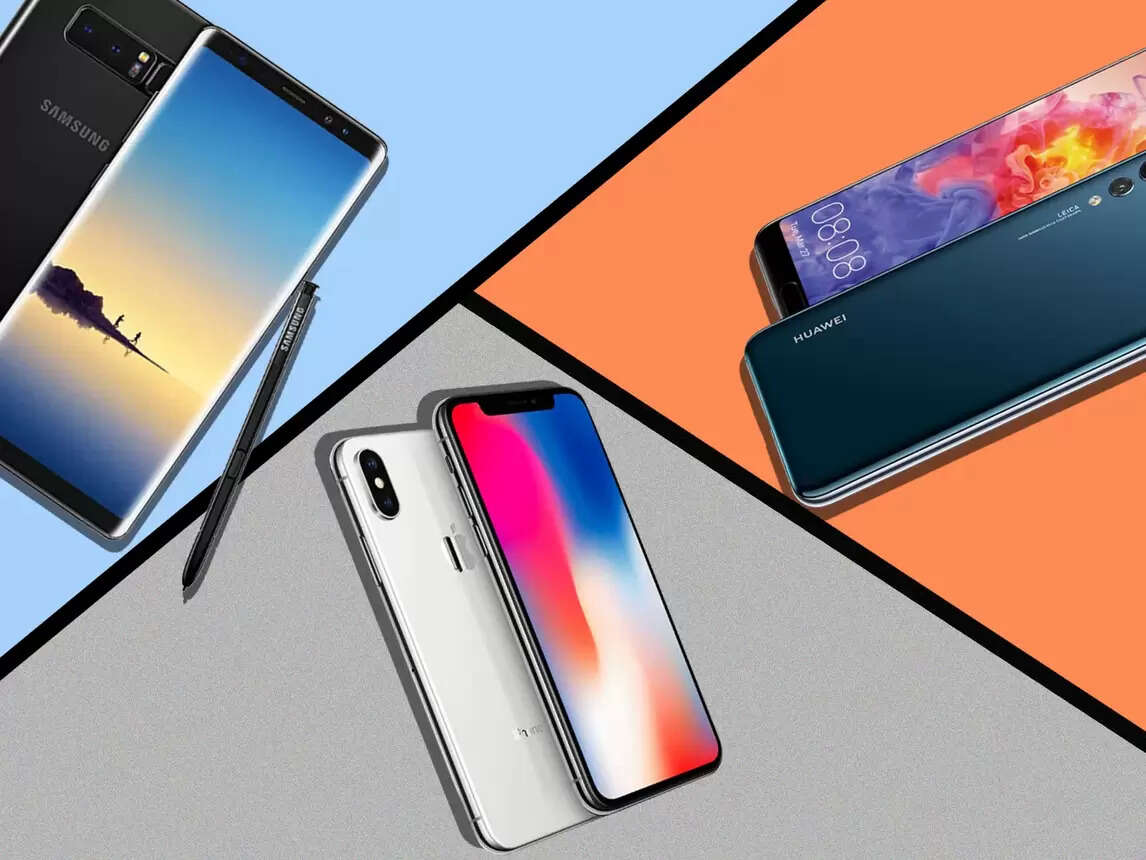

## ABOUT DATASET :


Mobile price depends on various factors such as brand	model,base color,processor,screen size,ROM,RAM,display size,num rear camera,num front camera,battery capacity,ratings,num of ratings,sales price,discount percent,sales. In this dataset, we want to estimate the price of mobile phones using the above features.

## DETAILS ABOUT THE DATASET :

#### brand: The name of the brand of the device.
#### model: The specific model of the device.
#### base_color: The primary color of the device.
#### processor The CPU type of the device.
#### screen_size: The diagonal size of the device's screen, usually measured in inches.
#### ROM: The amount of built-in storage in the device, measured in gigabytes (GB).
#### RAM: The amount of memory in the device, measured in gigabytes (GB).
#### display_size: The physical size of the device's display, usually measured in inches.
#### num_rear_camera: The number of cameras on the back of the device.
#### num_front_camera: The number of cameras on the front of the device.
#### battery_capacity: The capacity of the device's battery, measured in milliampere-hours (mAh).
#### ratings: The average rating of the device on a scale of 1 to 5 stars.
#### num_of_ratings: The total number of ratings given to the device.
#### sales_price: The current price of the device.
#### discount_percent: The percentage discount being offered on the device.
#### sales: The total number of sales of the device.




## <CENTER>IMPORTING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import klib as k
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import LinearSVR

In [2]:

data=pd.read_csv('Mobile dataset.csv')

In [3]:
data.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
data.tail()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77
429,Xiaomi,Redmi 6 Pro,Blue,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,8190,0.36,1.53


In [5]:
data.sample()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
107,Poco,M2,Black,MediaTek,Large,128,6,6.5,4,1,5000,4.3,98156,11499,0.23,112.87


In [6]:
data.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [8]:
data.shape

(430, 16)

### Checking null values

In [9]:
data.isnull().mean()*100

brand               0.0
model               0.0
base_color          0.0
processor           0.0
screen_size         0.0
ROM                 0.0
RAM                 0.0
display_size        0.0
num_rear_camera     0.0
num_front_camera    0.0
battery_capacity    0.0
ratings             0.0
num_of_ratings      0.0
sales_price         0.0
discount_percent    0.0
sales               0.0
dtype: float64

### Checking duplicate items

In [10]:
data.duplicated().sum()

0

## <CENTER>UNIVARIATE ANALYSIS

### HISTPLOT

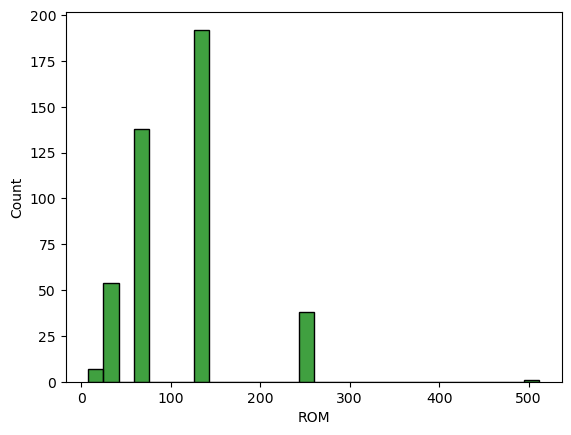

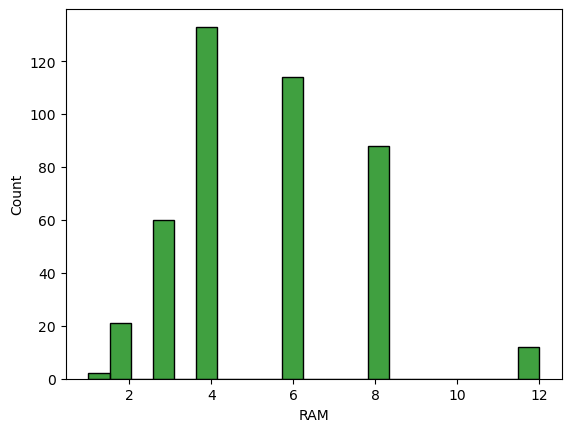

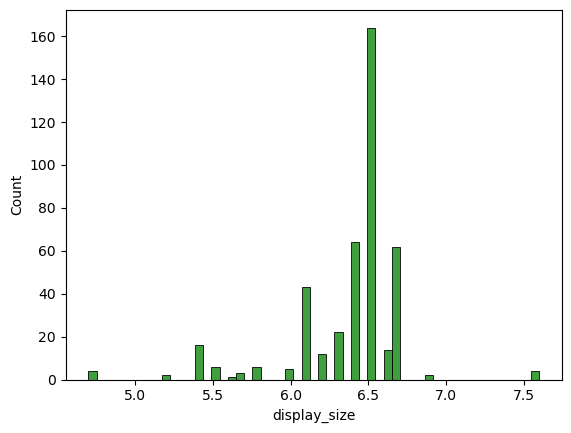

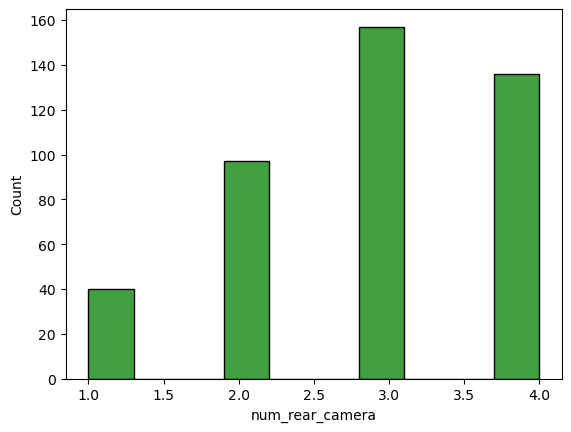

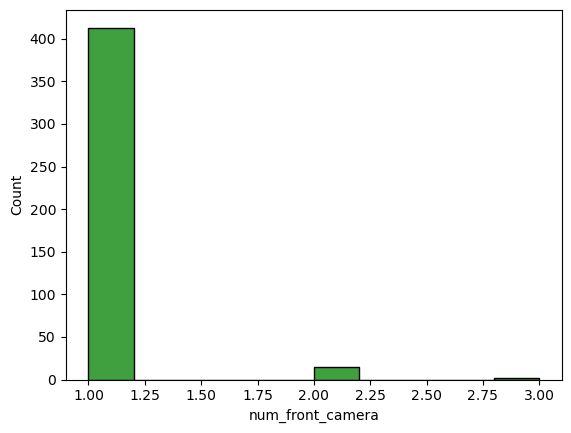

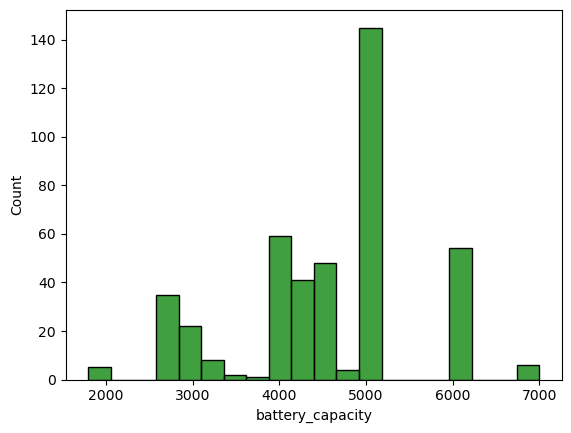

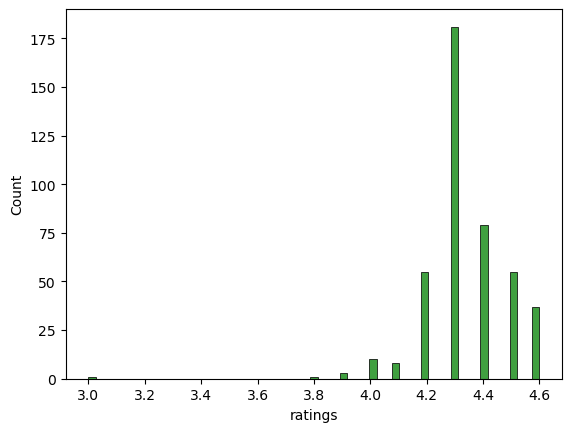

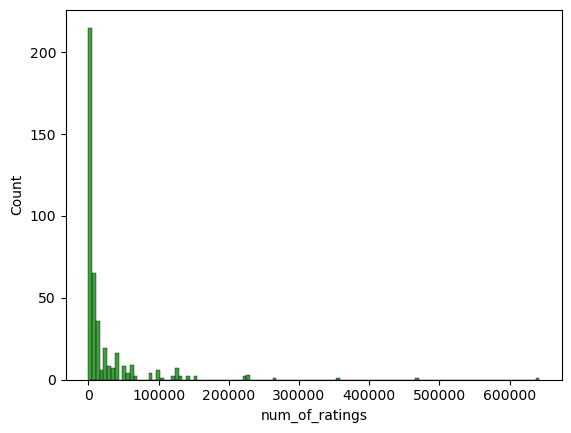

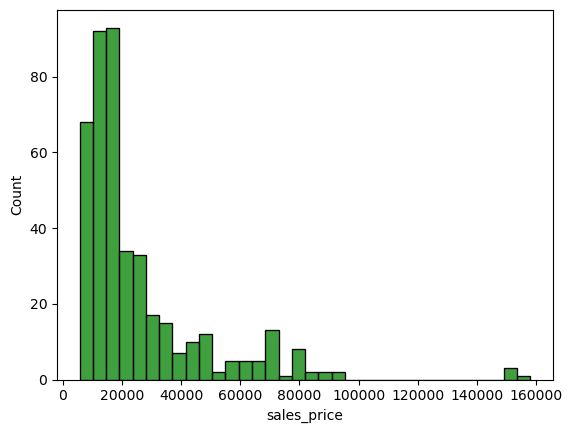

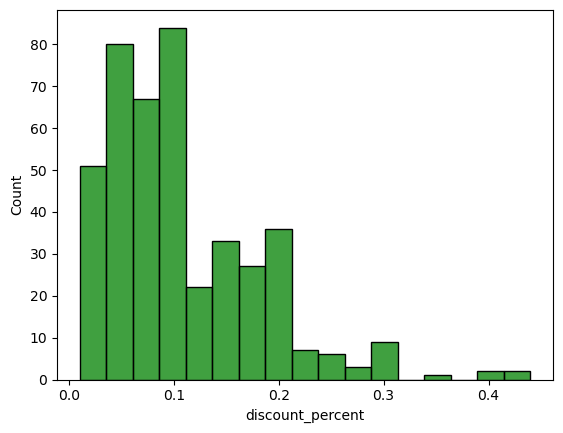

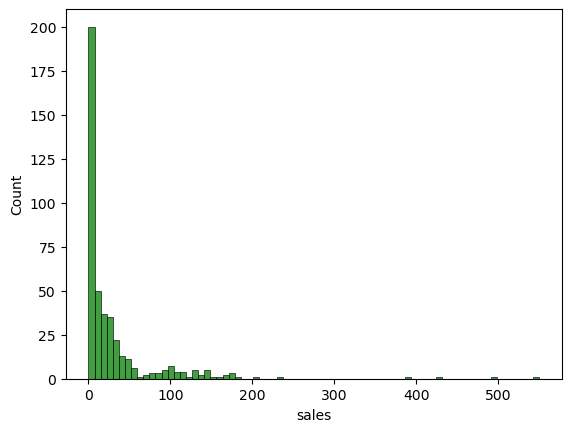

In [11]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x=data[i],color="green")
        plt.show()

### KDEPLOT

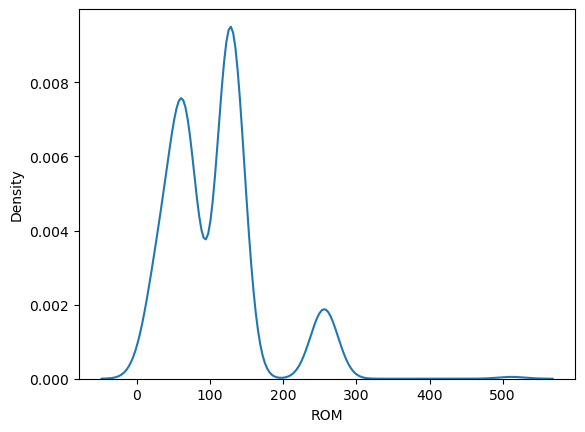

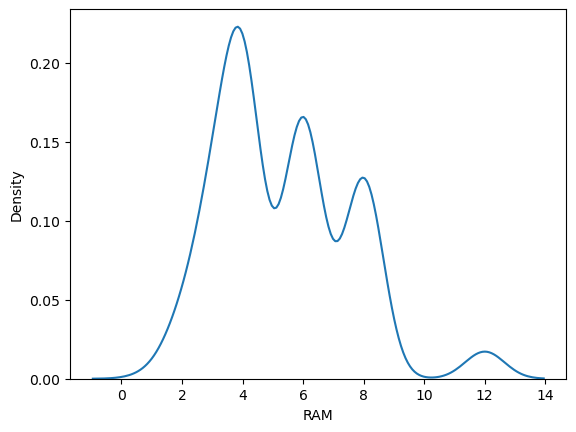

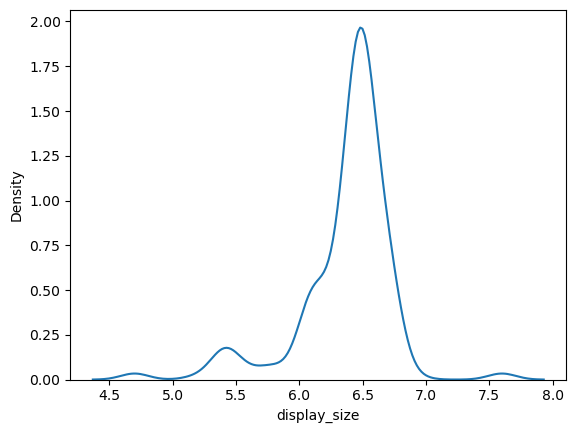

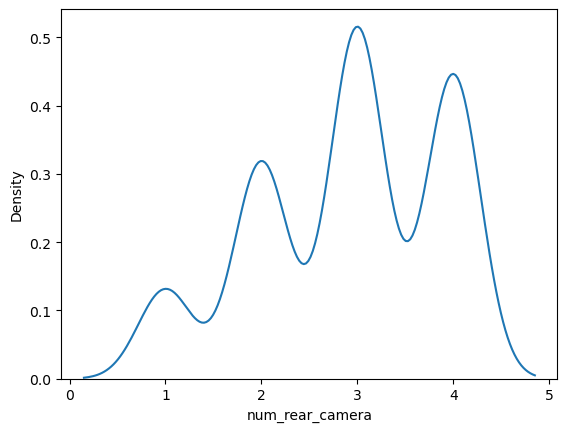

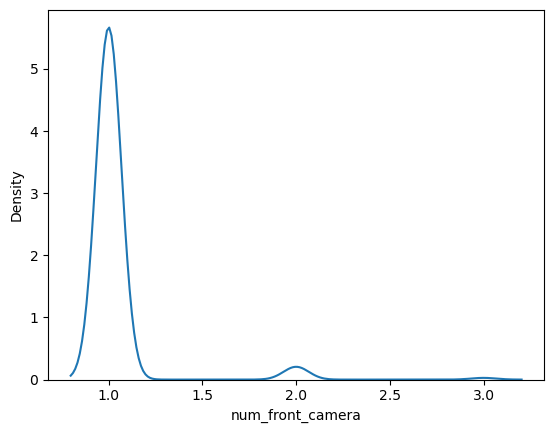

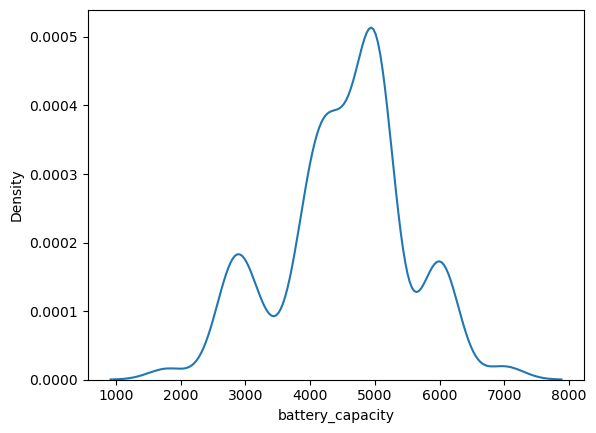

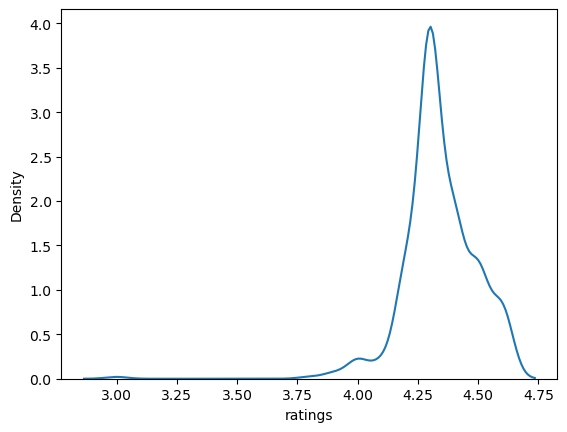

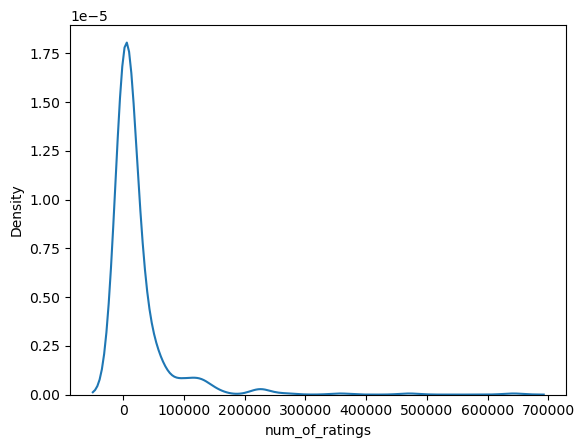

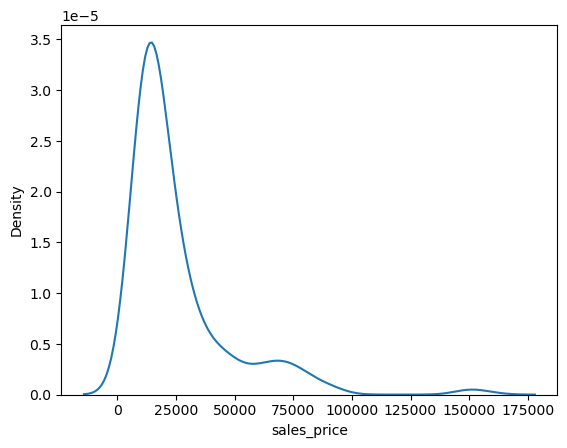

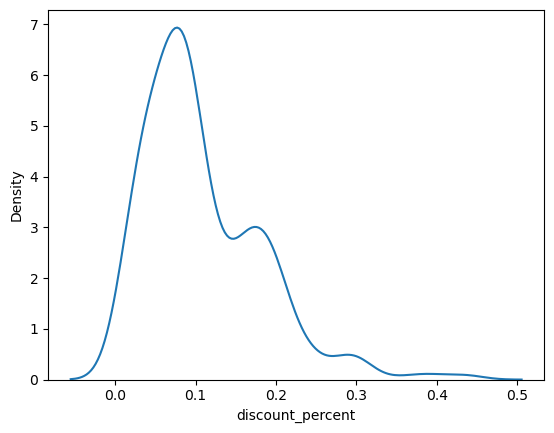

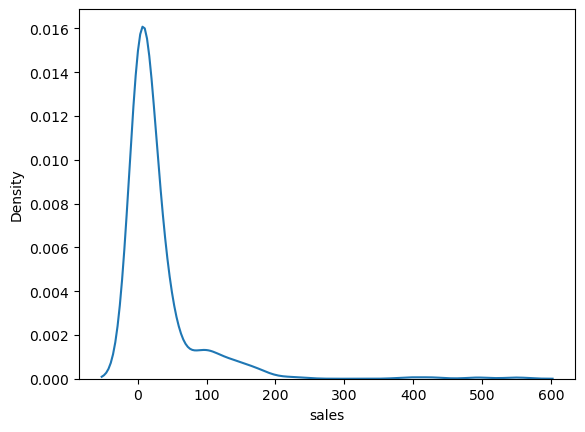

In [12]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x=data[i])
        plt.show()

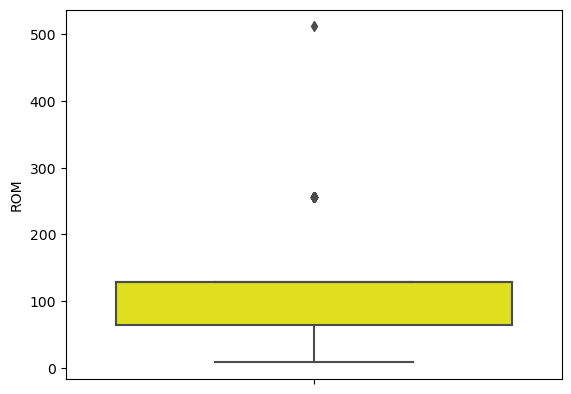

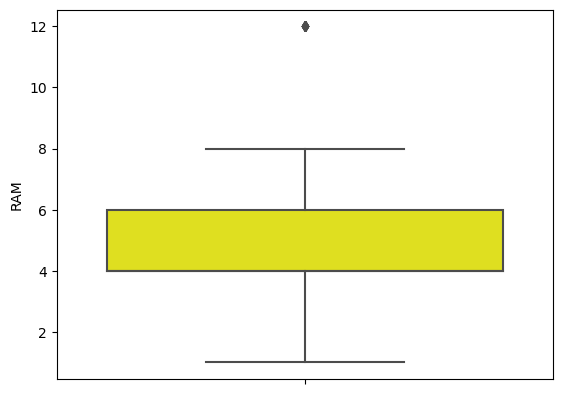

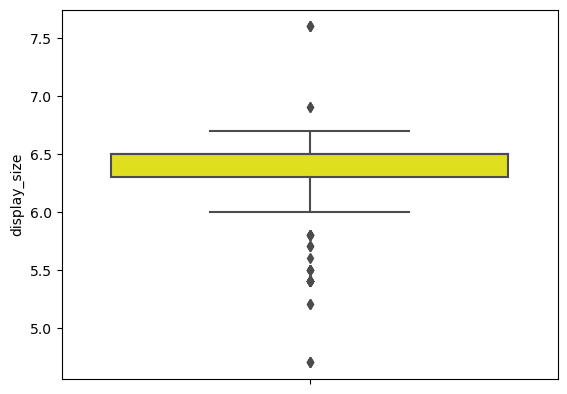

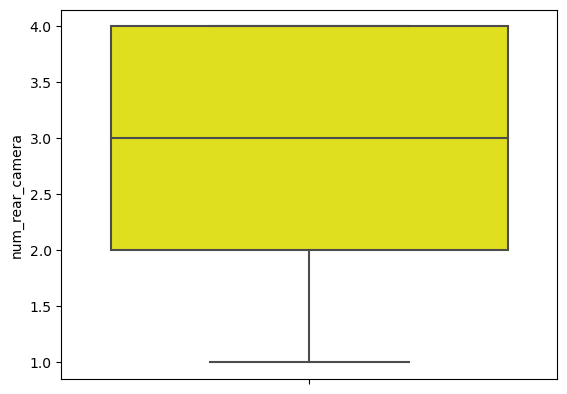

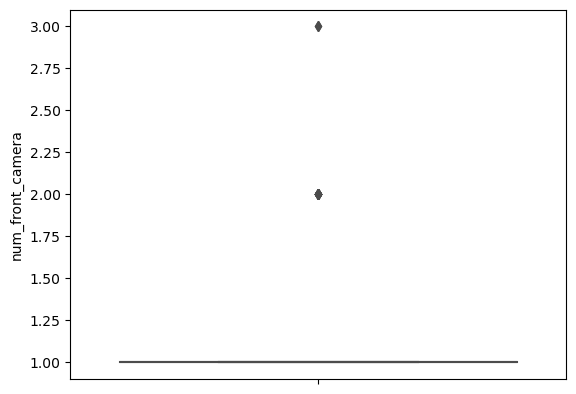

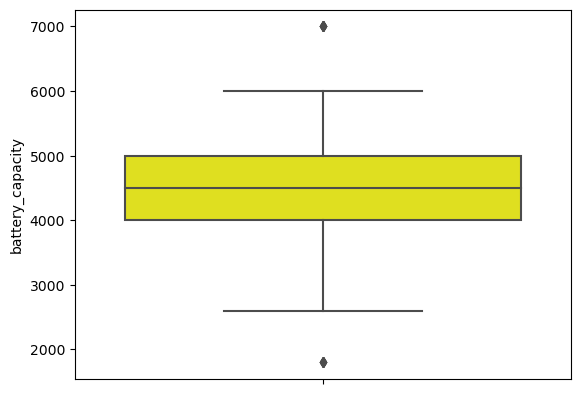

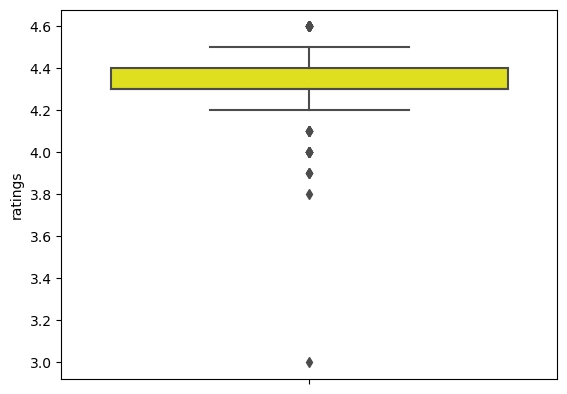

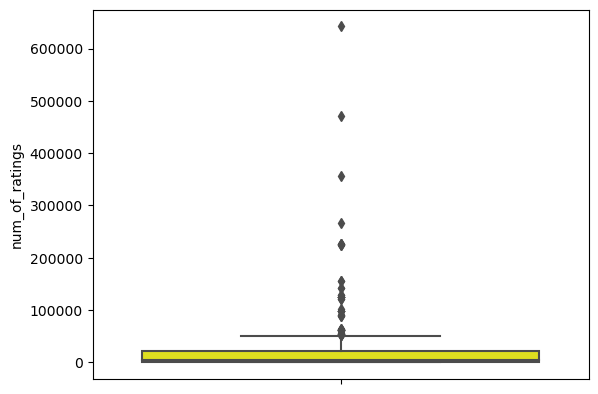

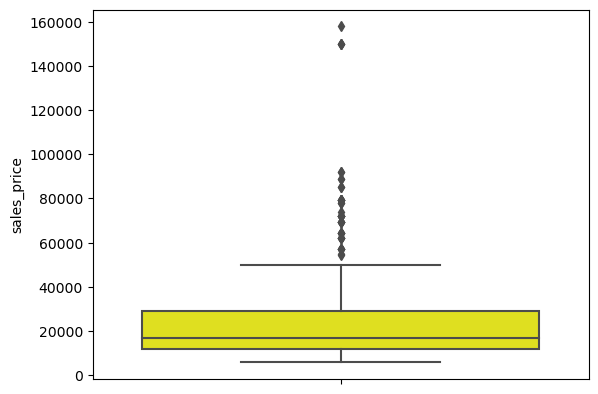

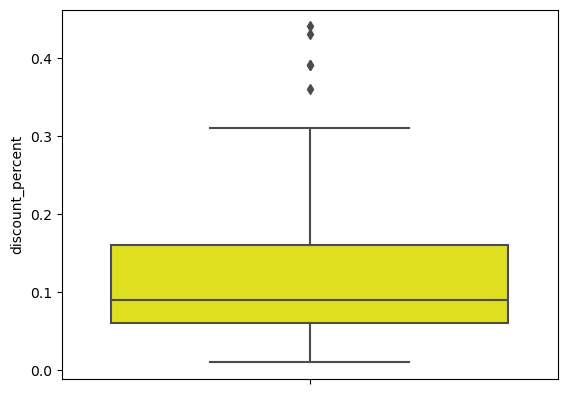

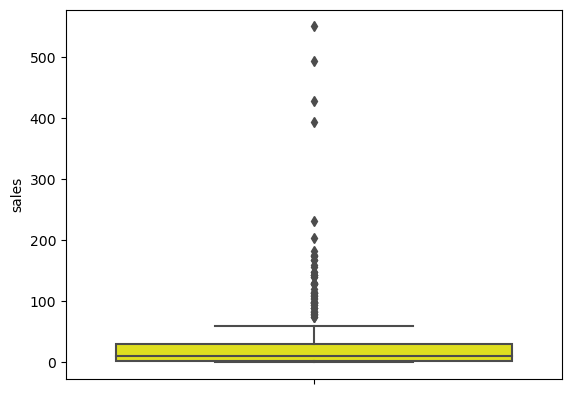

In [13]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y=data[i],color="yellow")
        plt.show()

## <Center>MULTIVARIATE ANALYSIS

### PIE CHART

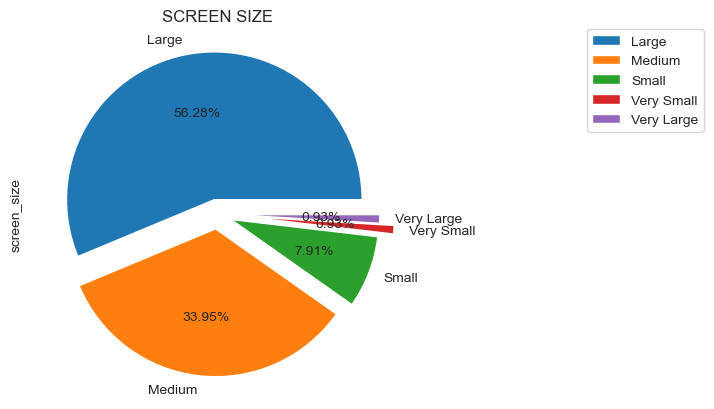

In [14]:
sns.set_style('ticks')
plt.title('SCREEN SIZE')
myexplode=[0.1,0.1,0.1,0.2,0.1]
data.screen_size.value_counts().plot.pie(autopct='%0.2f%%',explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left', borderaxespad=0);

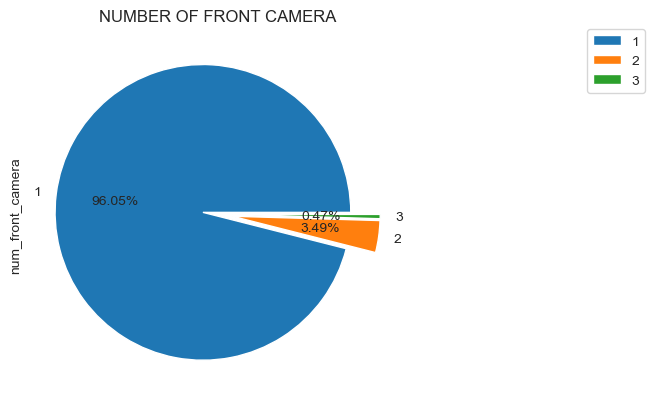

In [15]:
sns.set_style('ticks')
plt.title('NUMBER OF FRONT CAMERA')
myexplode=[0.1,0.1,0.1]
data.num_front_camera.value_counts().plot.pie(autopct='%0.2f%%',explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left', borderaxespad=0);

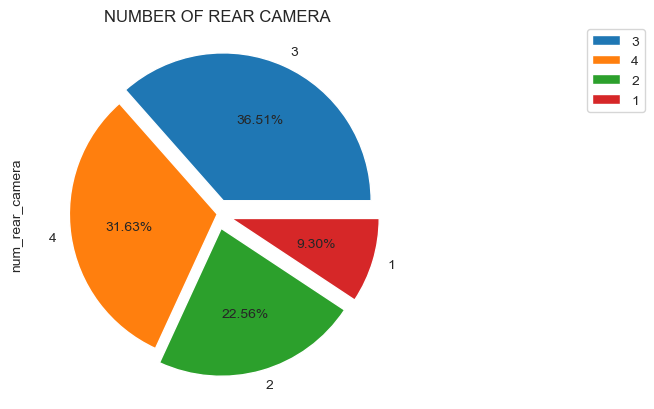

In [16]:
sns.set_style('ticks')
plt.title('NUMBER OF REAR CAMERA')
myexplode=[0.1,0,0.1,0.1]
data.num_rear_camera.value_counts().plot.pie(autopct='%0.2f%%',explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left', borderaxespad=0);

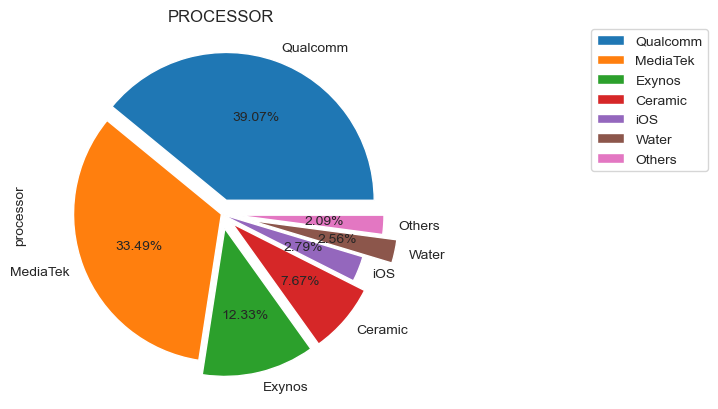

In [17]:
sns.set_style('ticks')
plt.title('PROCESSOR')
myexplode=[0.1,0,0.1,0.1,0,0.2,0.1]
data.processor.value_counts().plot.pie(autopct='%0.2f%%',explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left', borderaxespad=0);

## PAIR PLOT

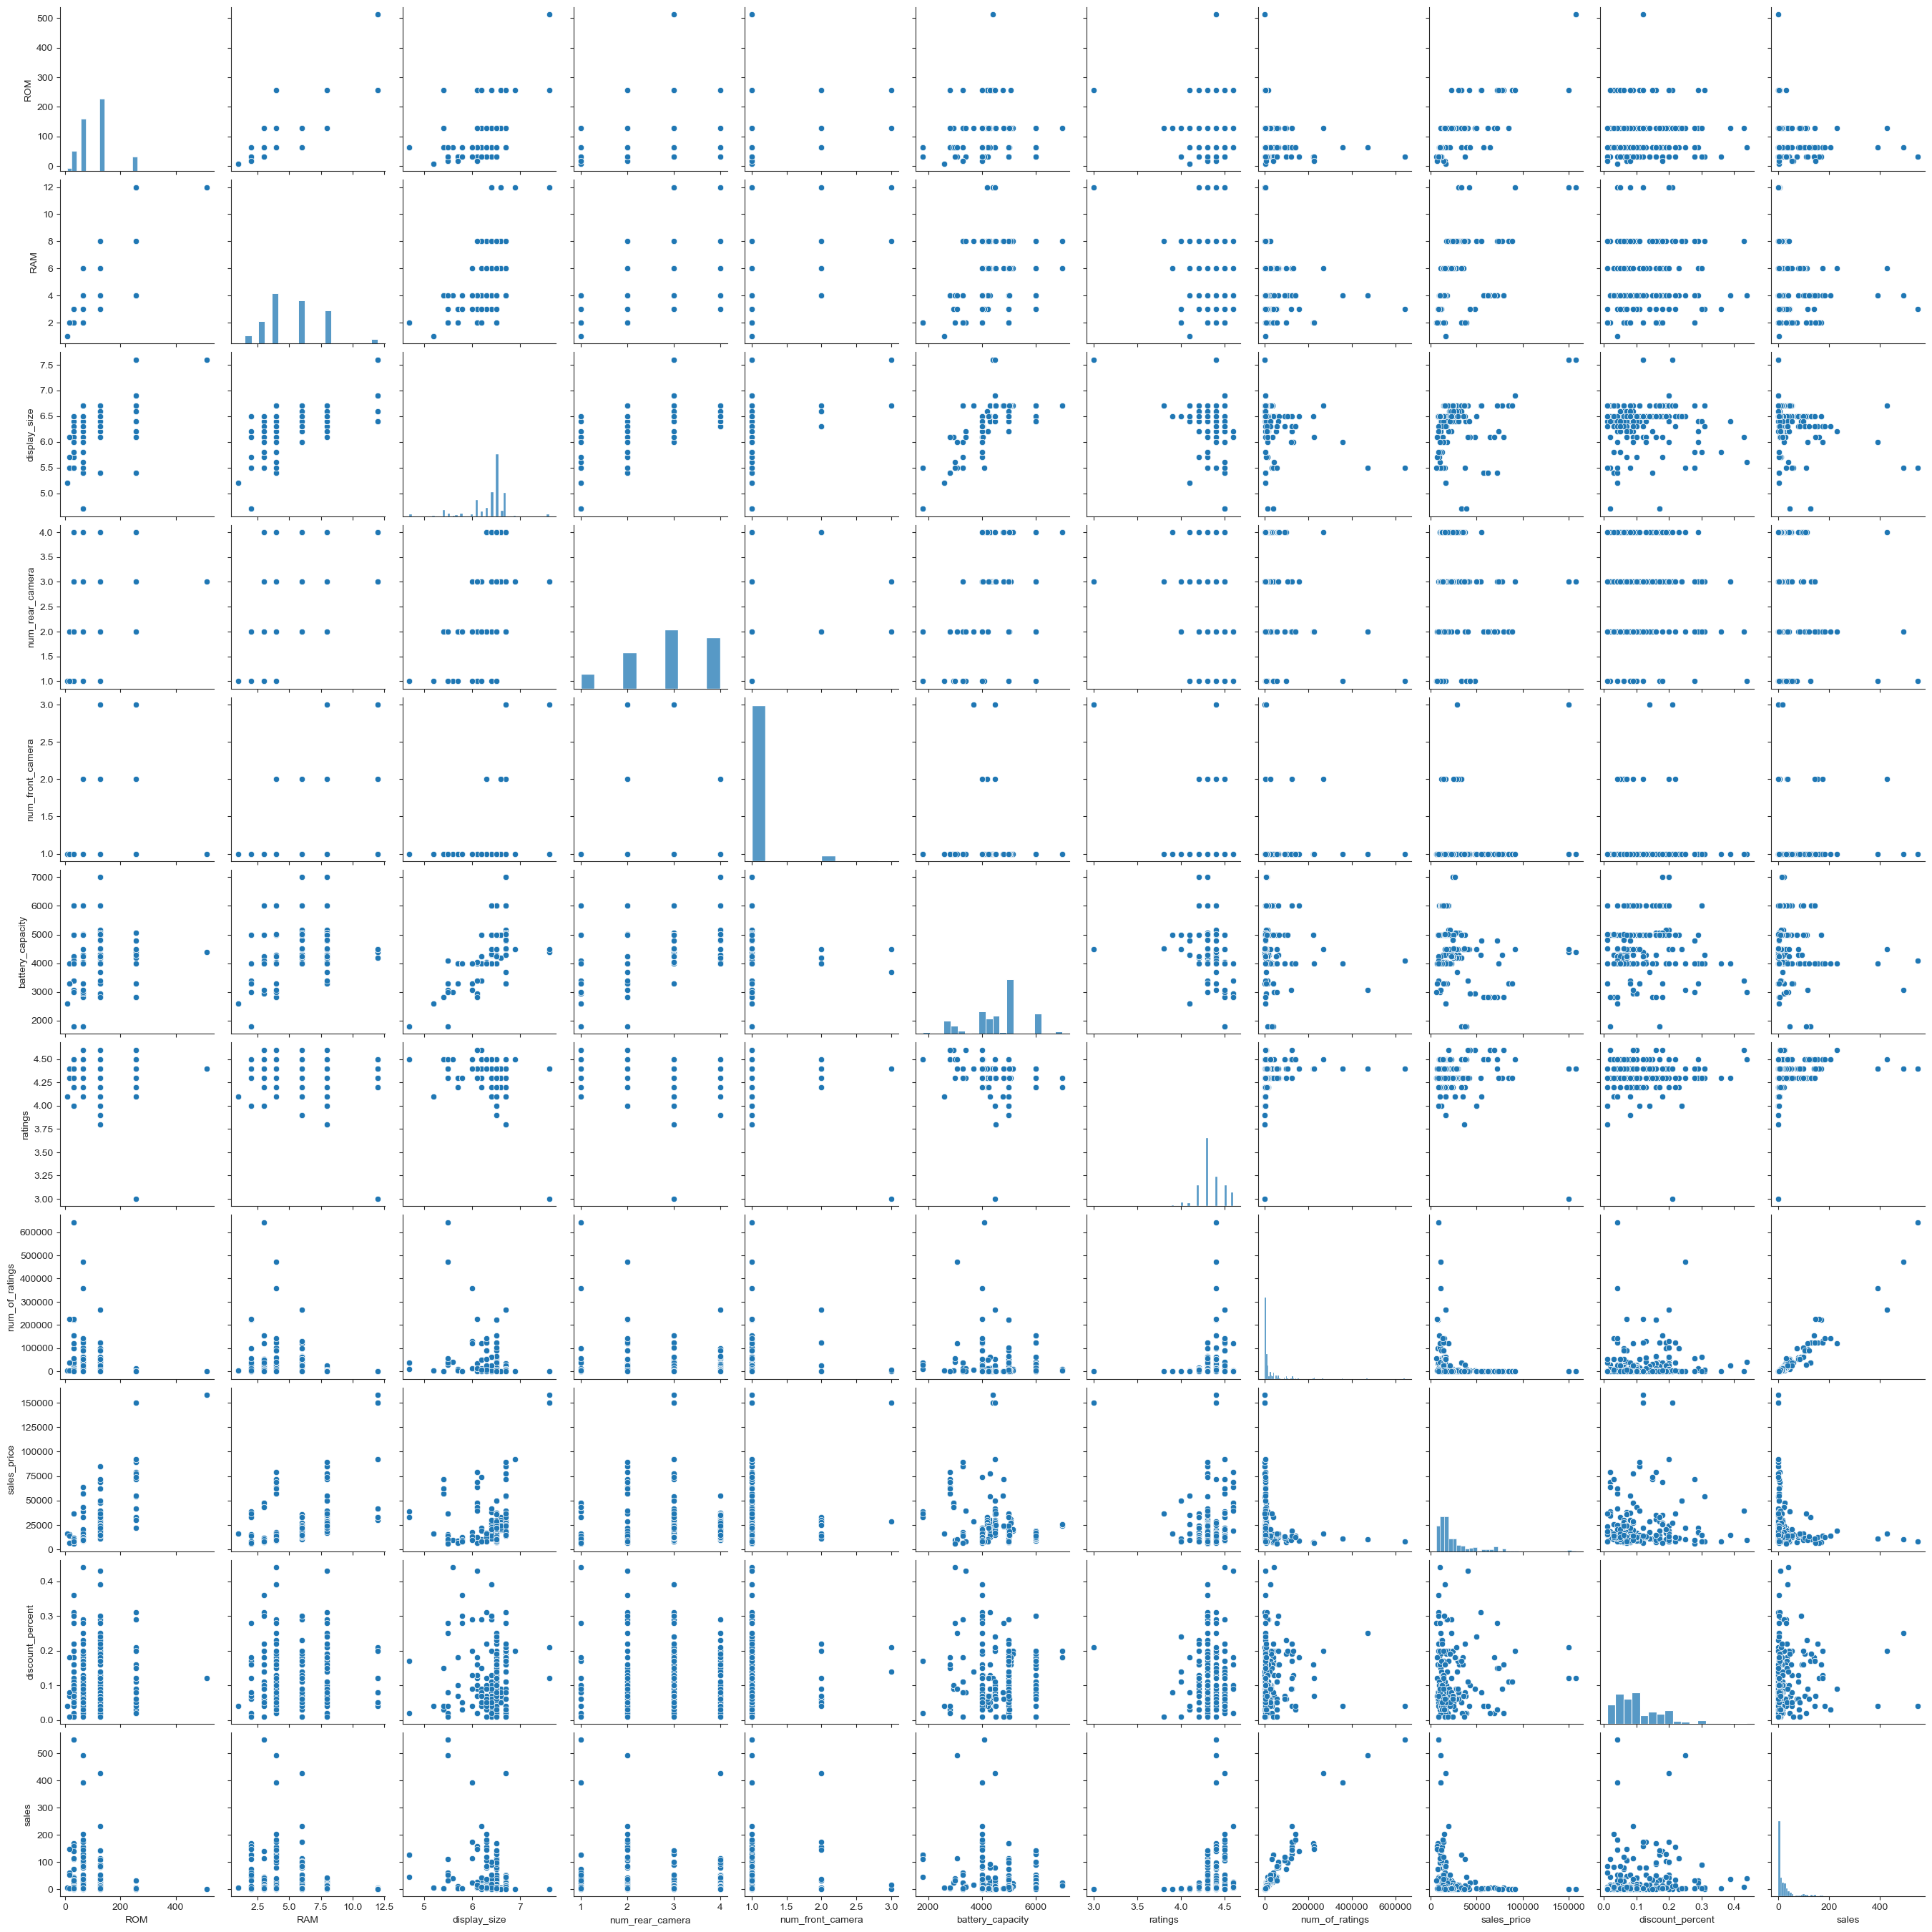

In [18]:
sns.pairplot(data=data)
plt.show()

ROM                    AxesSubplot(0.125,0.11;0.0596154x0.77)
RAM                 AxesSubplot(0.196538,0.11;0.0596154x0.77)
display_size        AxesSubplot(0.268077,0.11;0.0596154x0.77)
num_rear_camera     AxesSubplot(0.339615,0.11;0.0596154x0.77)
num_front_camera    AxesSubplot(0.411154,0.11;0.0596154x0.77)
battery_capacity    AxesSubplot(0.482692,0.11;0.0596154x0.77)
ratings             AxesSubplot(0.554231,0.11;0.0596154x0.77)
num_of_ratings      AxesSubplot(0.625769,0.11;0.0596154x0.77)
sales_price         AxesSubplot(0.697308,0.11;0.0596154x0.77)
discount_percent    AxesSubplot(0.768846,0.11;0.0596154x0.77)
sales               AxesSubplot(0.840385,0.11;0.0596154x0.77)
dtype: object

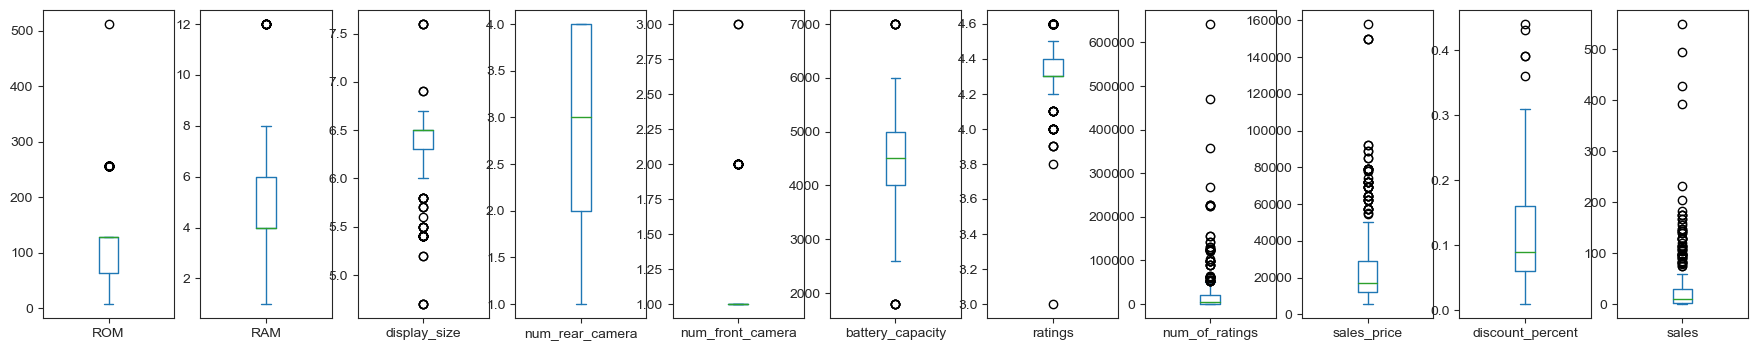

In [19]:
data.plot.box(figsize=(22,4),subplots=True)

### COUNTPLOT

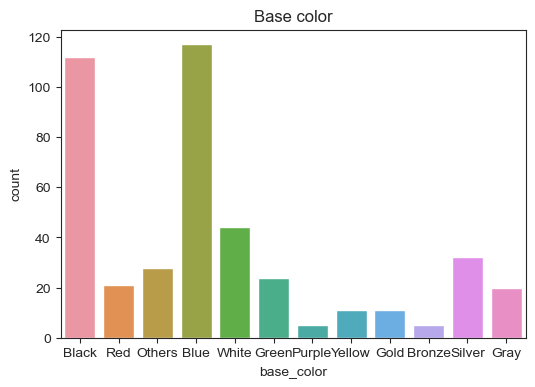

In [20]:
plt.figure(figsize=(6,4))
plt.title('Base color')
sns.countplot('base_color',data=data);
plt.show()

## LINE PLOT

<AxesSubplot:>

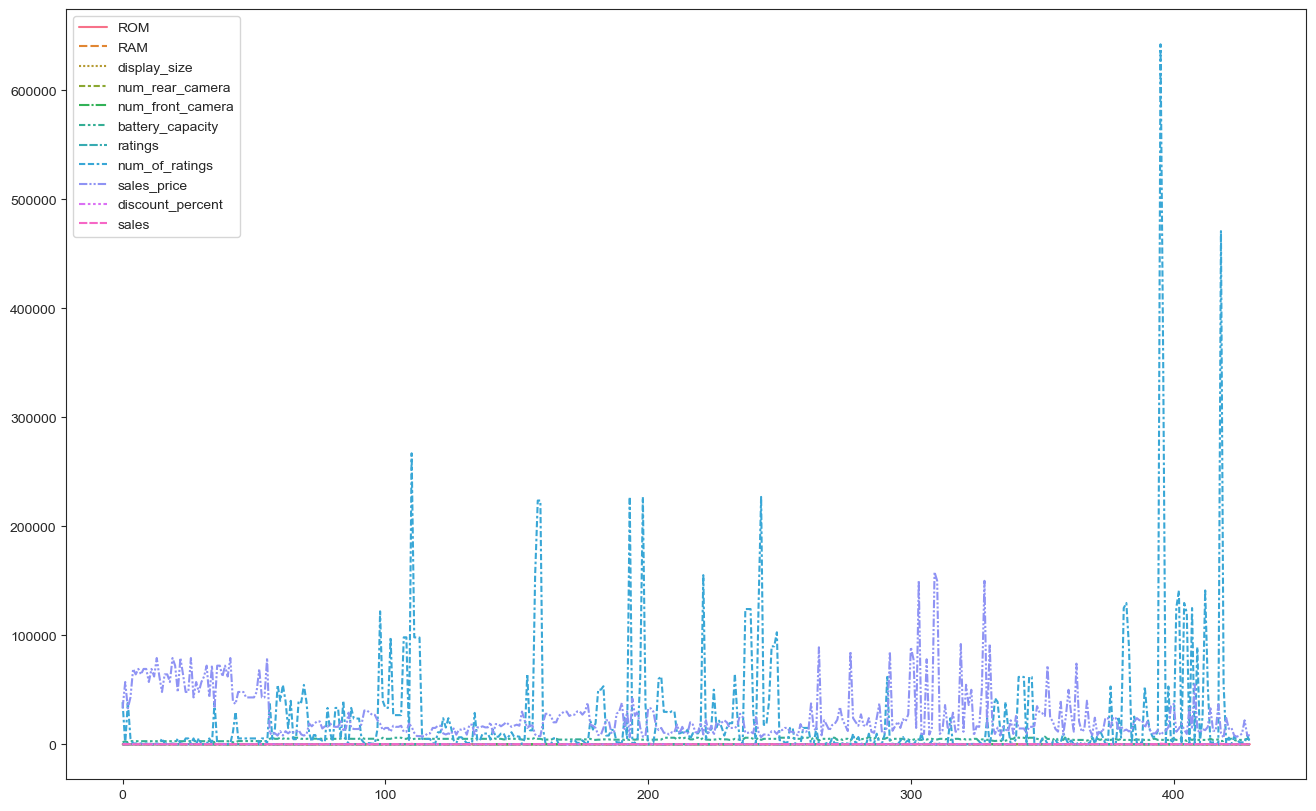

In [21]:
plt.figure(figsize=(16,10))
sns.lineplot(data=data)

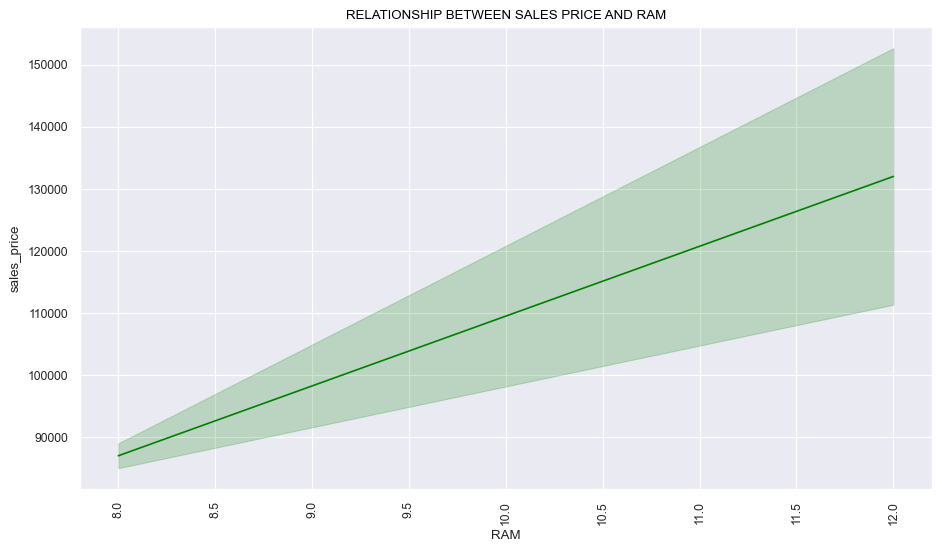

In [22]:
plt.figure(figsize=(11,6))
sns.set_style('dark')
sns.set_theme('paper')
sns.lineplot(x='RAM',y='sales_price',data=data.sort_values(by='sales_price',ascending=False)[:10],color='green')
plt.xticks(rotation=90)
plt.title(('RELATIONSHIP BETWEEN SALES PRICE AND RAM'),color='black')
plt
plt.show()

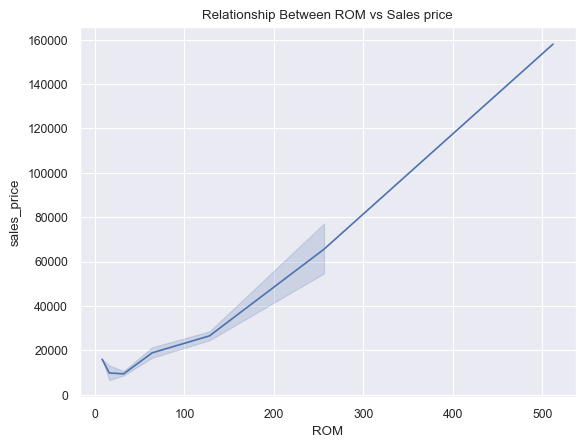

In [23]:
plt.title("Relationship Between ROM vs Sales price")
sns.lineplot('ROM','sales_price',data=data);
plt.show()

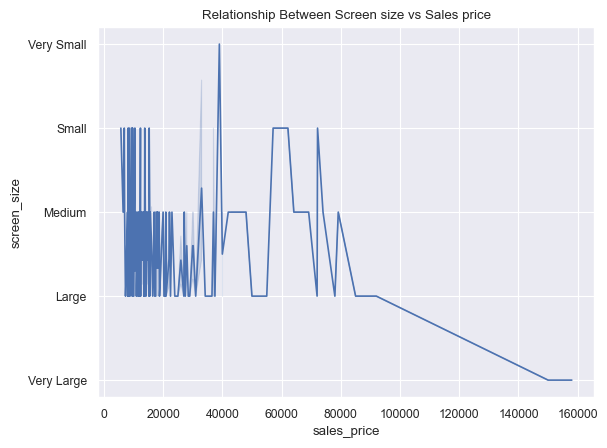

In [24]:
plt.title("Relationship Between Screen size vs Sales price")
sns.lineplot('sales_price','screen_size',data=data);
plt.show()

## BAR PLOT

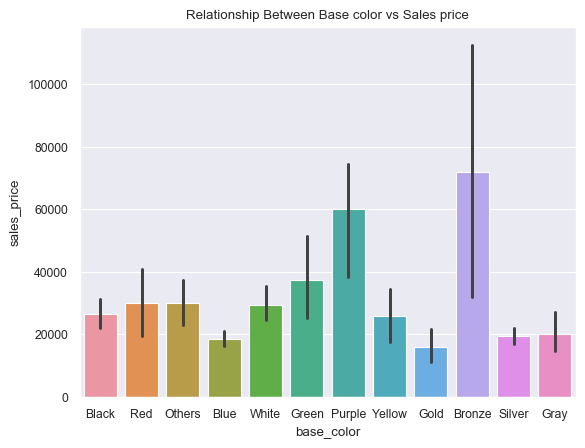

In [25]:
plt.title("Relationship Between Base color vs Sales price")
sns.barplot(x='base_color',y='sales_price',data=data);

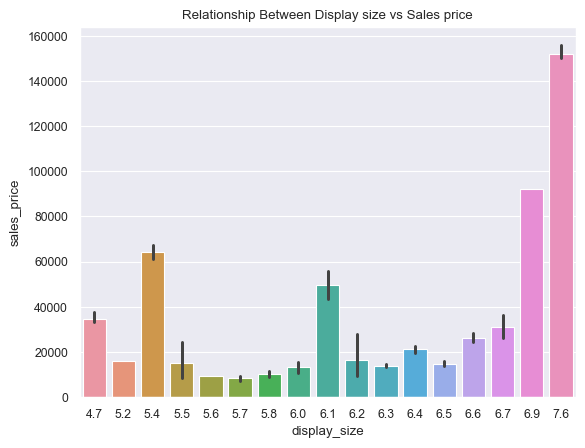

In [26]:
plt.title("Relationship Between Display size vs Sales price")
sns.barplot(x='display_size',y='sales_price',data=data);

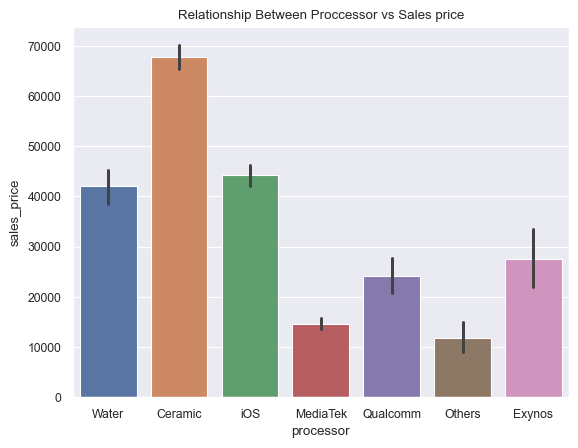

In [27]:
plt.title("Relationship Between Proccessor vs Sales price")
sns.barplot(x='processor',y='sales_price',data=data);

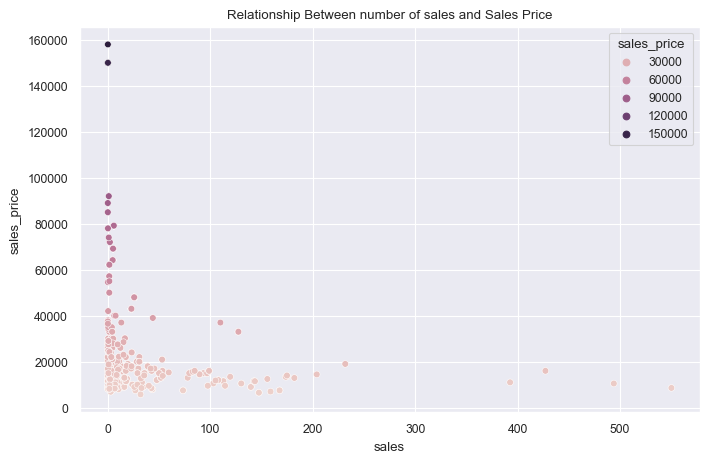

In [28]:
plt.figure(figsize=(8,5))
figure = sns.scatterplot(data=data, x='sales', y='sales_price', hue='sales_price')
plt.title('Relationship Between number of sales and Sales Price')
plt.show()

# OUTLIER TREATMENT

## BOXPLOT

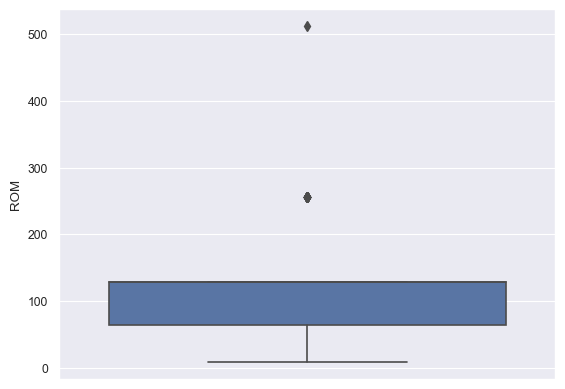

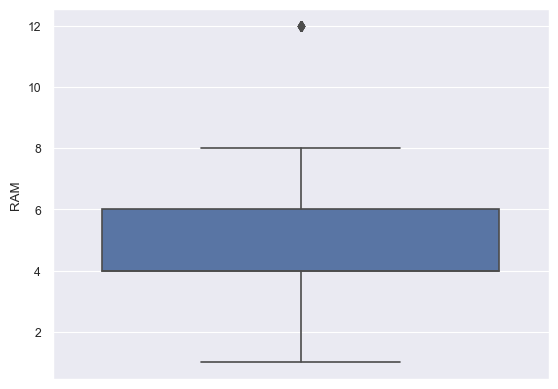

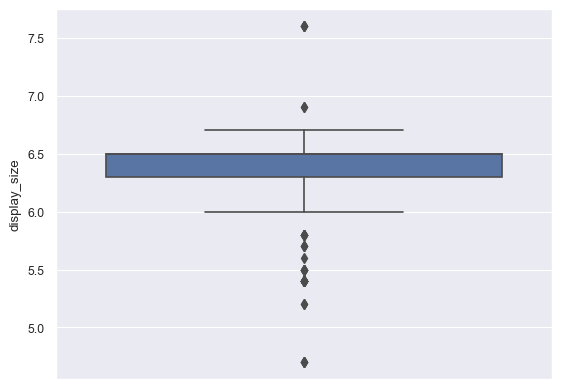

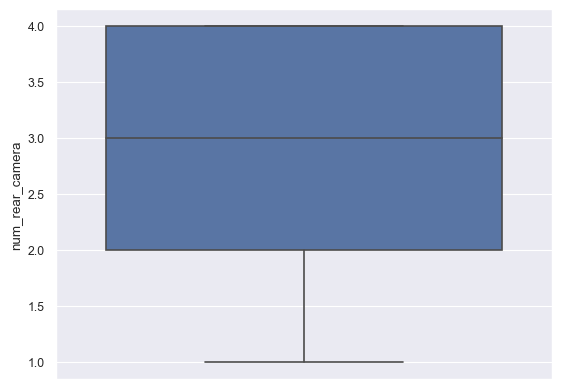

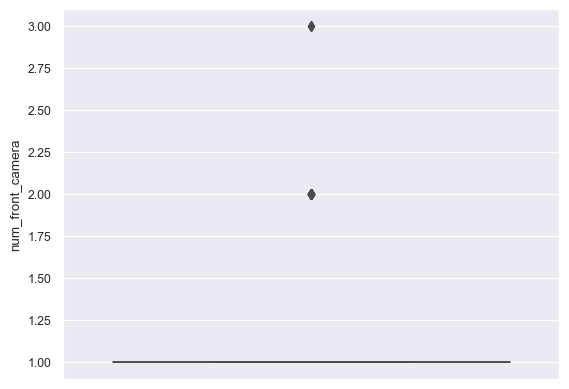

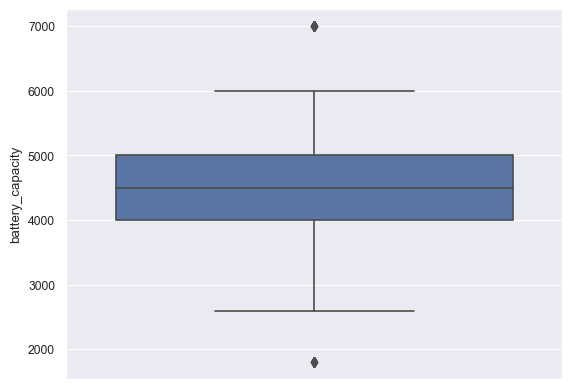

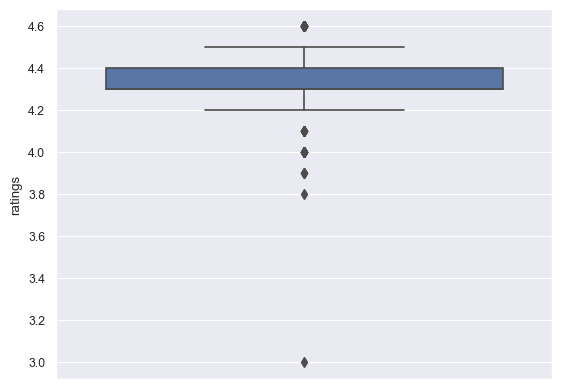

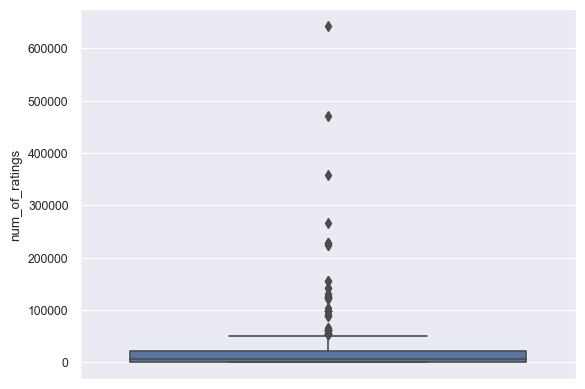

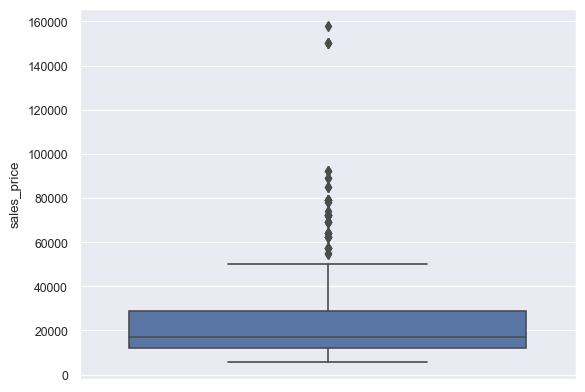

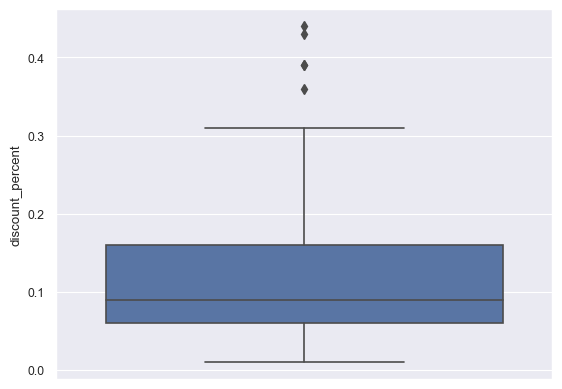

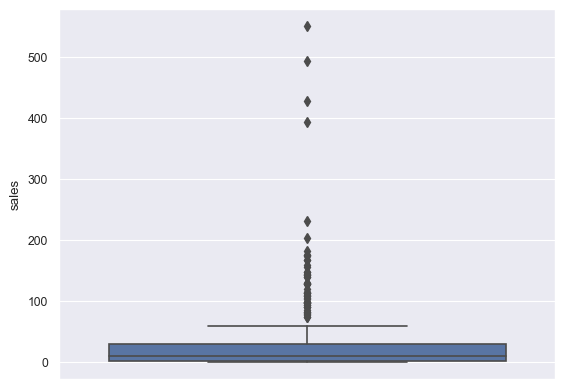

In [29]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y=data[i])
        plt.show()

## SETTING OUTLIER LIMITS

In [30]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL


In [31]:
for column in data.columns:
    if data[column].dtype !="object":
        UL, LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

In [32]:
data.dropna(inplace=True)

### LETS PLOT THE BOXPLOT AGAIN TO SEE THE DIFFRENCE

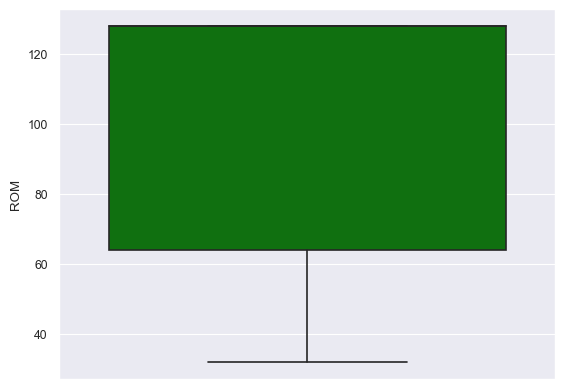

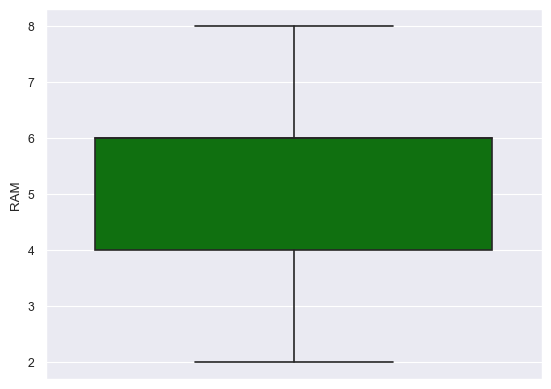

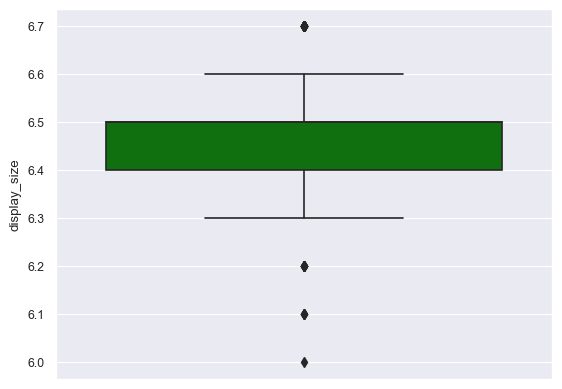

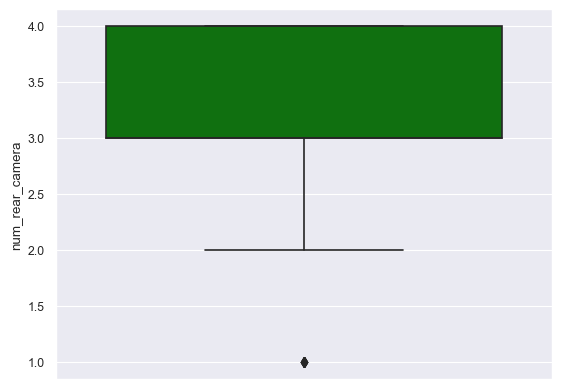

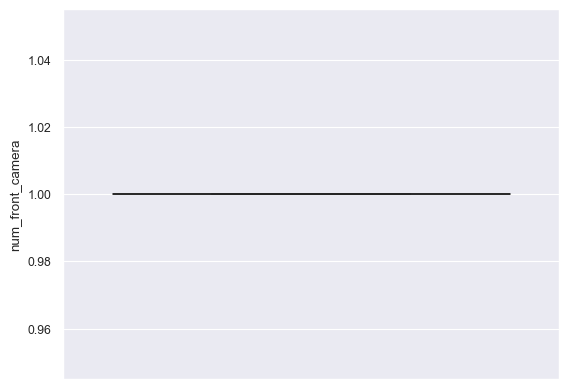

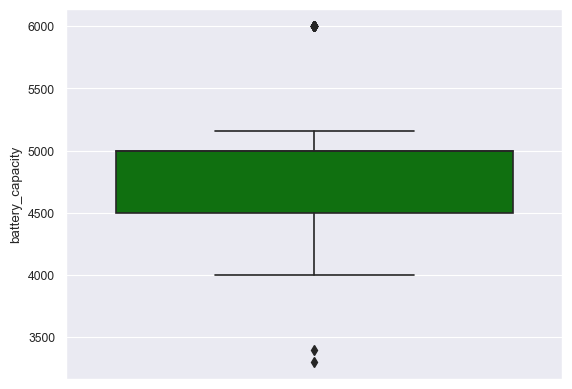

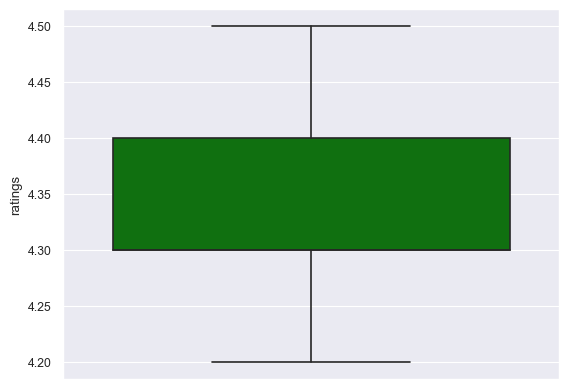

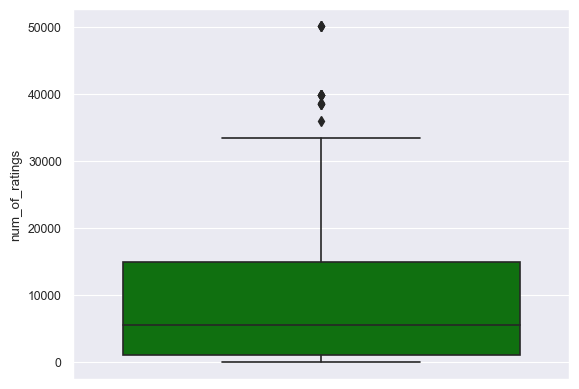

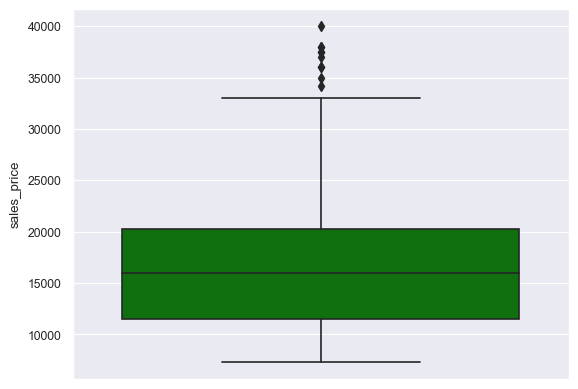

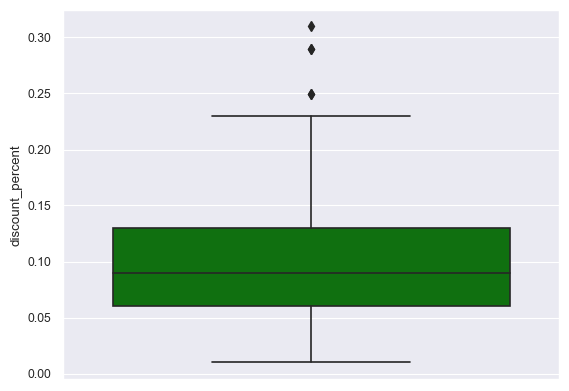

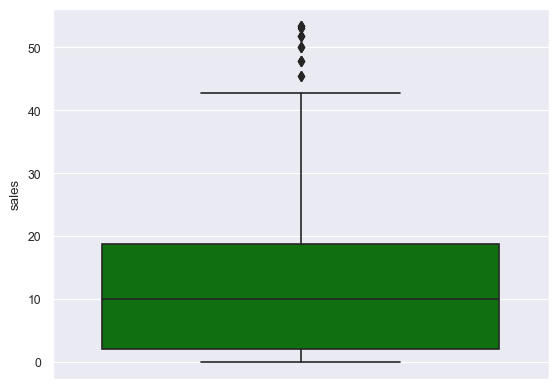

In [33]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(y=data[i],color="green")
        plt.show();

## Label encoding catagorical columns

In [34]:
le=LabelEncoder()

In [35]:
cols=['brand','model','base_color','processor','screen_size']
data[cols]=data[cols].apply(le.fit_transform)

In [36]:
data.head(10)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
56,0,15,0,1,0,64.0,4.0,6.5,3.0,1.0,5000.0,4.3,38496.0,8999.0,0.18,34.64
57,0,46,1,3,0,64.0,4.0,6.5,3.0,1.0,6000.0,4.3,4687.0,10999.0,0.08,5.16
58,0,45,1,1,0,64.0,4.0,6.5,4.0,1.0,5000.0,4.3,14878.0,9999.0,0.16,14.88
60,0,46,0,3,0,64.0,6.0,6.5,3.0,1.0,6000.0,4.3,39881.0,11999.0,0.07,47.85
62,0,46,1,3,0,64.0,6.0,6.5,3.0,1.0,6000.0,4.3,39881.0,11999.0,0.07,47.85
63,0,45,0,1,0,64.0,4.0,6.5,4.0,1.0,5000.0,4.3,14878.0,9999.0,0.16,14.88
64,0,46,11,3,0,64.0,6.0,6.5,3.0,1.0,6000.0,4.3,39881.0,11999.0,0.07,47.85
65,0,46,11,3,0,64.0,4.0,6.5,3.0,1.0,6000.0,4.3,4687.0,10999.0,0.08,5.16
66,0,46,0,3,0,64.0,4.0,6.5,3.0,1.0,6000.0,4.3,4687.0,10999.0,0.08,5.16
67,0,46,0,3,0,128.0,6.0,6.5,3.0,1.0,6000.0,4.3,39881.0,12999.0,0.13,51.84


## checking correlation with target 'SALES PRICE'

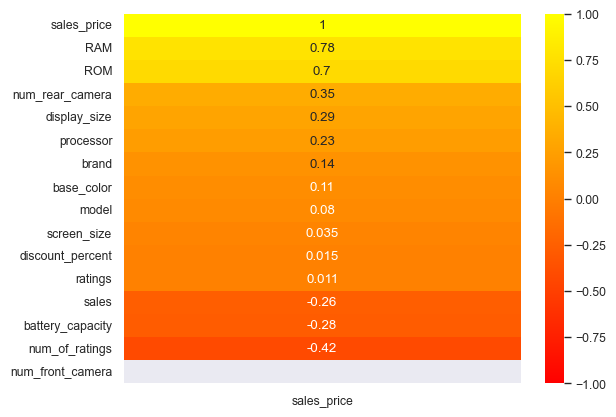

In [37]:
sns.heatmap(data.corr()[["sales_price"]].sort_values(by="sales_price",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

### Let's take only the columns with good correlation with target

In [50]:
x=data[['ROM','processor','RAM','model','num_rear_camera','display_size']].values

In [51]:
y=data[['sales_price']].values

## Feature scaling

In [52]:
rs = RobustScaler()
x = rs.fit_transform(x)

## Model Building

In [53]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

## Cross validation

In [54]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  4438.170109641587
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  4434.011363876592
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  17959.537896646954
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  3798.9439580086
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  3503.8211877562635
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  3816.828931790011
************************************************

## Selecting GradientBoostingRegressor as it having best metrics

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
model=GradientBoostingRegressor()

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

# Predicting Y

In [59]:
y_pred=model.predict(x)
OUTPUT=pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTION"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,8999.0,9969.317537
1,10999.0,10960.048092
2,9999.0,10947.436750
3,11999.0,13151.588739
4,11999.0,13151.588739


## SCATTERPLOT

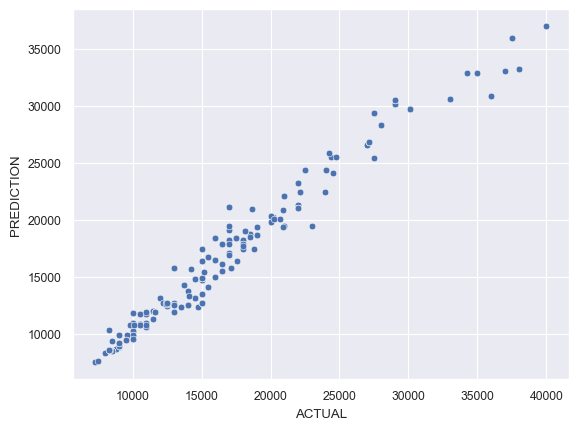

In [60]:
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTION");

In [61]:
model.score(x,y)*100

96.38078202491036

## CONCLUSION

The data points in the scatter plot are tightly clustered around the regression line, indicating a strong correlation between the variables. This suggests that changes in ROM,processor,RAM,model have a significant impact on SALES PRICE